In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [3]:
KEYS = [
    'entity_id',
    'financial_report_id',
    'financial_statement_id',
    'entity_ico',
    'entity_name']

DIMENSIONS = [
    'year',
    # 'month',
    # 'financial_report_order_number',
    'period_length',
    # 'consolidated',
    # 'approved_date',
    'type',
    'financial_report_template_id',
    # 'establishment_date',
    # 'cancellation_date',
    # 'sknace_code',
    # 'entity_state',
    'legal_form_code',
    'org_size_code',
    'ownership_category_code',
    'entity_consolidated',
    # 'sknace_division_name',
    'sknace_division',
    # 'sknace_subcategory',
    'sal_class',
    'is_outlier']

PRIMARY_VALUES = [
    'CA',
    'CASH',
    'CL',
    'EQ',
    'NCL',
    'TA',
    'TL',
    'CC',
    'INV',
    'CF_NETTO',
    'CF_SELFFIN',
    'EAT',
    'EBIT',
    'SAL',
    'COST',
    'INT',
    'YIE',
    'LABOR']

RATIOS = [
    'L3',
    'L2',
    'L1',
    'CF_CL',
    'CASH_TA',
    'SAL_TA',
    'TL_SAL',
    'INV_COST',
    'INV_SAL',
    'CC_SAL',
    'TA_SAL',
    'TL_TA',
    'CF_TL',
    'CL_TA',
    'NCL_TA',
    'EQ_TL',
    'EQ_TA',
    'CL_CC',
    'ROE',
    'EAT_TA',
    'ROA_BRUTTO',
    'CF_TA',
    'CF_SAL',
    'ROS',
    'EAT_YIE',
    'ROI',
    'ROA_NETTO',
    'LABOR_PRODUCTIVITY']

DISTRESS_SIGNALS = [
    'DPHZ_vat_registration_cancelled',
    'DPHZ_vat_registration_cancelled_1y_off',
    'DPHZ_vat_registration_cancelled_2y_off',
    'DPHZ_vat_registration_cancelled_3y_off',
    'RU_event',
    'RU_event_1y_off',
    'RU_event_2y_off',
    'RU_event_3y_off',
    'cancellation_year',
    'RUZ_cancelled',
    'RUZ_cancelled_1y_off',
    'RUZ_cancelled_2y_off',
    'RUZ_cancelled_3y_off']

In [4]:
training_raw = pd.read_csv('../../DATA/FINAL/training_sample.csv')
testing_raw = pd.read_csv('../../DATA/FINAL/testing_sample.csv')
training_raw

,entity_id,year,month,financial_report_id,financial_report_template_id,CA,CASH,CL,EQ,NCL,TA,TL,CC,INV,CF_NETTO,CF_SELFFIN,EAT,EBIT,SAL,COST,INT,YIE,LABOR,L3,L2,L1,CF_CL,CASH_TA,SAL_TA,TL_SAL,INV_COST,INV_SAL,CC_SAL,TA_SAL,TL_TA,CF_TL,CL_TA,NCL_TA,EQ_TL,EQ_TA,EBIT_INT,CL_CC,ROE,EAT_TA,ROA_BRUTTO,CF_TA,CF_SAL,ROS,EAT_YIE,ROI,ROA_NETTO,LABOR_PRODUCTIVITY,financial_statement_id,financial_report_order_number,entity_ico,period_length,consolidated,approved_date,type,entity_name,establishment_date,cancellation_date,sknace_code,entity_state,legal_form_code,org_size_code,ownership_category_code,entity_consolidated,sknace_division_name,sknace_division,sknace_subcategory,DPHZ_vat_registration_cancelled,DPHZ_vat_registration_cancelled_1y_off,DPHZ_vat_registration_cancelled_2y_off,DPHZ_vat_registration_cancelled_3y_off,RU_event,RU_event_1y_off,RU_event_2y_off,RU_event_3y_off,cancellation_year,RUZ_cancelled,RUZ_cancelled_1y_off,RUZ_cancelled_2y_off,RUZ_cancelled_3y_off,sal_class,establishment_year,is_outlier,RUZ_indirect_criteria,RUZ_indirect_criteria_1y_off,RUZ_indirect_criteria_2y_off,RUZ_indirect_criteria_3y_off,combined_issue_criteria_1y_off,combined_issue_criteria_2y_off,combined_issue_criteria_3y_off,plausible_sample
0,27971.0,2016.0,1.0,5838803,699.0,1852723.0,319402.0,976378.0,192931.0,38092.0,2027003.0,1834072.0,1516675.0,13285.0,-55428.0,-57305.0,-75527.0,-73650.0,6390177.0,6422232.0,26465.0,6390870.0,357001.0,1.897547,1.880498,0.327129,-0.056769,0.157574,3.152525,0.287014,0.744694,0.748430,0.237345,114.194189,0.904820,-0.030221,0.481686,0.018792,0.105193,0.095180,-1.782921,0.643762,-0.391472,-0.037260,-0.036334,-0.027345,-0.008674,-0.011819,-0.011818,-0.024204,-0.037260,0.055867,3333297.0,1.0,652423.0,12.0,NaN,2017-06-26,Riadna,KUHO - mix. spol. s r.o.,1991-06-25,NaN,49410.0,NaN,112.0,2.0,2.0,False,Pozemná doprava a doprava potrubím,H,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0,0,0,0,2. Malý,1991,False,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,71752.0,2015.0,1.0,5058691,699.0,912862.0,2213.0,48840.0,2399.0,18406.0,948368.0,945969.0,910649.0,0.0,-35846.0,-38726.0,-57122.0,-54242.0,2134583.0,2202672.0,67110.0,2179262.0,12114.0,18.690868,18.690868,0.045311,-0.733948,0.002333,2.250796,0.443163,0.000000,0.000000,0.426617,159.943408,0.997470,-0.037893,0.051499,0.019408,0.002536,0.002530,0.191745,0.053632,-23.810754,-0.060232,-0.057195,-0.037798,-0.016793,-0.026760,-0.026212,0.010532,-0.060232,0.005675,2703097.0,1.0,36584649.0,12.0,NaN,2016-03-10,Riadna,FeCom s.r.o.,2004-10-08,NaN,46720.0,NaN,112.0,0.0,8.0,False,"Veľkoobchod, okrem motorových vozidiel a motoc...",G,46.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,0,0,0,0,2. Malý,2004,True,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,72912.0,2017.0,1.0,6351388,699.0,1481047.0,1630.0,1326396.0,-718007.0,549510.0,1521883.0,2239890.0,1417869.0,61548.0,47298.0,44418.0,10312.0,13192.0,4512342.0,4460274.0,32121.0,4512573.0,692228.0,1.116595,1.070192,0.001229,0.035659,0.001071,2.964973,0.496392,4.967695,4.910372,0.314220,121.417632,1.471789,0.021116,0.871549,0.361072,-0.320555,-0.471789,1.410697,0.935486,-0.014362,0.006776,0.008668,0.031079,0.010482,0.002285,0.002285,0.027882,0.006776,0.153408,3748560.0,1.0,35904798.0,12.0,NaN,2018-06-21,Riadna,"WETRON, s.r.o.",2004-10-23,NaN,33200.0,NaN,112.0,0.0,8.0,False,Oprava a inštalácia strojov a prístrojov,C,33.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,0,0,0,0,2. Malý,2004,False,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,74296.0,2016.0,1.0,5844975,699.0,514344.0,10817.0,477398.0,-100409.0,0.0,1660755.0,1761164.0,410644.0,92883.0,66009.0,-141558.0,-344270.0,-341390.0,4362628.0,4667711.0,34421.0,4362628.0,501993.0,1.077390,0.882829,0.022658,0.138268,0.006513,2.626894,0.403693,7.163657,7.664619,0.094128,137.043956,1.060460,0.037480,0.287458,0.000000,-0.057013,-0.060460,-8.918073,1.162559,3.428677,-0.207297,-0.205563,0.039746,0.015131,-0.078913,-0.078913,-0.186571,-0.207297,0.115067,3338450.0,2.0,36561380.0,12.0,NaN,2017-07-28,Riadna,Hoeckle s.r.o.,2004-06-25,NaN,25620.0,NaN,112.0,0.0,7.0,False,Výr

In [6]:
SAL_CLASSES = training_raw['sal_class'].unique()
SKNACE_GROUPS = training_raw['sknace_division'].unique()

In [7]:
modelling_dataset = training_raw.query('is_outlier == False')

In [8]:
mean_values = dict()

for sal_class in SAL_CLASSES:
    for sknace in SKNACE_GROUPS:
        subset_training = modelling_dataset.query('sal_class == @sal_class and sknace_division == @sknace')
        segment_mean_values = dict()
        for col in RATIOS:
            segment_mean_values[col] = subset_training[col].mean()
        
        mean_values[(sal_class, sknace)] = segment_mean_values
    


In [18]:
training_filled = pd.DataFrame()
testing_filled = pd.DataFrame()


for sal_class in SAL_CLASSES:
    for sknace in SKNACE_GROUPS:
        subset_training = training_raw.query('sal_class == @sal_class and sknace_division == @sknace')
        subset_testing = testing_raw.query('sal_class == @sal_class and sknace_division == @sknace')
        segment_mean_values = mean_values[(sal_class, sknace)]
        for col in RATIOS:
            mean_value = segment_mean_values[col]
            subset_training[col] = subset_training[col].fillna(mean_value)
            subset_testing[col] = subset_testing[col].fillna(mean_value)

        training_filled = pd.concat([training_filled, subset_training], axis = 0)
        testing_filled = pd.concat([testing_filled, subset_testing], axis = 0)

C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_9968\3442714407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_training[col] = subset_training[col].fillna(mean_value)
C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_9968\3442714407.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_testing[col] = subset_testing[col].fillna(mean_value)


IMBALANCED TESTING - RAW
0.857051282051282
0.0
0.0
0.0
0.49925317401045555
0.49925317401045555


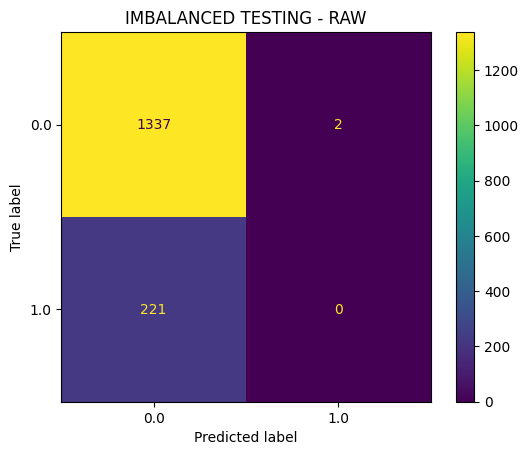

IMBALANCED TESTING - FORCE BALANCE
0.5346153846153846
0.21142857142857144
0.8371040723981901
0.3375912408759124
0.6608970698062646
0.6608970698062646


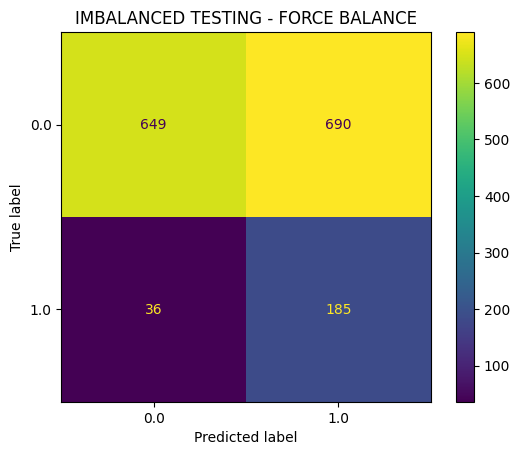

IMBALANCED TESTING - SMOTE+RUS
0.5538461538461539
0.2135102533172497
0.8009049773755657
0.3371428571428572
0.6569872160962966
0.6569872160962966


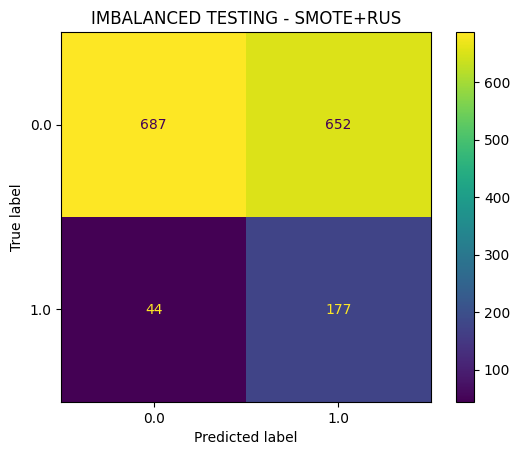

In [40]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline




Q = training_filled.query('is_outlier == False and combined_issue_criteria_3y_off == 1')['entity_id'].nunique()

training_balanced = (
    pd.concat(
        [
            training_filled.query('is_outlier == False and combined_issue_criteria_3y_off == 0').sample(Q),
            training_filled.query('is_outlier == False and combined_issue_criteria_3y_off == 1').sample(Q),
        ], axis = 0
    )
)



Q_test = testing_filled.query('is_outlier == False and combined_issue_criteria_3y_off == 1')['entity_id'].nunique()

testing_balanced = (
    pd.concat(
        [
            testing_filled.query('is_outlier == False and combined_issue_criteria_3y_off == 0').sample(Q_test),
            testing_filled.query('is_outlier == False and combined_issue_criteria_3y_off == 1').sample(Q_test),
        ], axis = 0
    )
)


X_train_balanced = training_balanced[['EQ_TL', 'CF_SAL', 'L3', 'ROS']].values
y_train_balanced = training_balanced['combined_issue_criteria_3y_off'].values

X_test_balanced = testing_balanced[['EQ_TL', 'CF_SAL', 'L3', 'ROS']].values
y_test_balanced = testing_balanced['combined_issue_criteria_3y_off'].values

X_train_imbalanced = training_filled.query('is_outlier == False')[['EQ_TL', 'CF_SAL', 'L3', 'ROS']].values
y_train_imbalanced = training_filled.query('is_outlier == False')['combined_issue_criteria_3y_off'].values

X_test_imbalanced = testing_filled.query('is_outlier == False')[['EQ_TL', 'CF_SAL', 'L3', 'ROS']].values
y_test_imbalanced = testing_filled.query('is_outlier == False')['combined_issue_criteria_3y_off'].values

smote = SMOTE(sampling_strategy='auto', random_state=42)
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

model_raw = LogisticRegression(max_iter=2000)
model_force_balance = LogisticRegression(max_iter=2000)
model_smote_rus = LogisticRegression(max_iter=2000)

pipeline_raw = Pipeline([('Logistic Regression', model_raw)])
pipeline_force_balance = Pipeline([('Logistic Regression', model_force_balance)])
pipeline_smote_rus = Pipeline([('SMOTE', smote), ('RUS', rus), ('Logistic Regression', model_smote_rus)])

pipeline_raw.fit(X_train_imbalanced, y_train_imbalanced)
pipeline_force_balance.fit(X_train_balanced, y_train_balanced)
pipeline_smote_rus.fit(X_train_imbalanced, y_train_imbalanced)


scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'balanced_accuracy']


predictions_raw = pipeline_raw.predict(X_test_imbalanced)
predictions_force_balance = pipeline_force_balance.predict(X_test_imbalanced)
predictions_smote_rus = pipeline_smote_rus.predict(X_test_imbalanced)

print('IMBALANCED TESTING - RAW')
print(accuracy_score(y_test_imbalanced, predictions_raw))
print(precision_score(y_test_imbalanced, predictions_raw))
print(recall_score(y_test_imbalanced, predictions_raw))
print(f1_score(y_test_imbalanced, predictions_raw))
print(roc_auc_score(y_test_imbalanced, predictions_raw))
print(balanced_accuracy_score(y_test_imbalanced, predictions_raw))


cm = confusion_matrix(y_test_imbalanced, predictions_raw, labels=pipeline_raw.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pipeline_raw.classes_)
disp.plot()
plt.title('IMBALANCED TESTING - RAW')
plt.show()


print('IMBALANCED TESTING - FORCE BALANCE')
print(accuracy_score(y_test_imbalanced, predictions_force_balance))
print(precision_score(y_test_imbalanced, predictions_force_balance))
print(recall_score(y_test_imbalanced, predictions_force_balance))
print(f1_score(y_test_imbalanced, predictions_force_balance))
print(roc_auc_score(y_test_imbalanced, predictions_force_balance))
print(balanced_accuracy_score(y_test_imbalanced, predictions_force_balance))


cm = confusion_matrix(y_test_imbalanced, predictions_force_balance, labels=pipeline_force_balance.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pipeline_force_balance.classes_)
disp.plot()
plt.title('IMBALANCED TESTING - FORCE BALANCE')
plt.show()


print('IMBALANCED TESTING - SMOTE+RUS')
print(accuracy_score(y_test_imbalanced, predictions_smote_rus))
print(precision_score(y_test_imbalanced, predictions_smote_rus))
print(recall_score(y_test_imbalanced, predictions_smote_rus))
print(f1_score(y_test_imbalanced, predictions_smote_rus))
print(roc_auc_score(y_test_imbalanced, predictions_smote_rus))
print(balanced_accuracy_score(y_test_imbalanced, predictions_smote_rus))


cm = confusion_matrix(y_test_imbalanced, predictions_smote_rus, labels=pipeline_smote_rus.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=pipeline_smote_rus.classes_)
disp.plot()
plt.title('IMBALANCED TESTING - SMOTE+RUS')
plt.show()


In [ ]:
possible_features = RATIOS[::]
selected_features = ['EQ_TL', 'CF_SAL', 'L3', 'ROS']

for feature in selected_features:
    possible_features.remove(feature)

summary = []

for candidate_feature in possible_features:

    feature_set_summary = []

    for _ in range(20):

        summary_row = []

        summary_row += generate_logit_model(training_data_filled, [candidate_feature] + selected_features, 'combined_issue_criteria_3y_off')
        feature_set_summary.append(summary_row)    
        
    summary.append([selected_features, candidate_feature] + np.matrix(feature_set_summary).mean(axis=0).tolist().pop())



logit_summary_df = pd.DataFrame(summary, columns = ['selected_features', 'candidate_feature', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC Score', 'Balanced Accuracy'])

display(logit_summary_df.shape[0])
display(logit_summary_df.sort_values('F1 Score', ascending = False).head(20))
# display(logit_summary_df.sort_values('F1 Score', ascending = True).head(20))

